<a href="https://colab.research.google.com/github/MathieuRita/LE_test/blob/master/LazImpa_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LazImpa**

*Mathieu Rita*



_______________
**INTRODUCTION**

This notebook shows how to run the experiments from the paper: *“LazImpa”: Lazy and Impatient neural agents learn to communicate efficiently*. WIth this notebook, you will be able to reproduce the results shown in the paper. By default, we set here a small input space (`n_features=100`) such that an experiment can be run in a few hours on Google Colab.

The notebook is organized in 3 sections:

- I- Clone LazImpa repository and set the environment
- II- Train LazImpa
- III- Analyse results.

_________________

## I - Clone LazImpa repository and set the environment

___________________

In this section, clone LazImpa GitHub repository and set the environment with the correct architecture. In order to save the useful data during the training you have to choose a directory name (ex: `dir_save`) in which all the training data will be saved and create it with the following organization:

|_ `dir_save`

|___ `messages`

|___ `accuracy`

|___ `sender`

|___ `receiver`

Then, for analysis, create a directory in which all the analytical data will be saved (ex: `analysis`)

Eventually, import some functions that will be used for the analysis.
___________________

In [10]:
'''
# RUN IF RUNNING FROM COLLAB
# Clone repository
! git clone https://github.com/KrzakalaPaul/Speech-Challenge.git
! mv "./Lazimpa/egg" "./egg"
! mv "./Lazimpa/example" "./example"
# Create the useful directory for training and analysis
! mkdir -p dir_save/{accuracy,messages,sender,receiver} # dir_save is the saving directory name
! mkdir analysis
'''

'\n# RUN IF RUNNING FROM COLLAB\n# Clone repository\n! git clone https://github.com/MathieuRita/Lazimpa.git\n! mv "./Lazimpa/egg" "./egg"\n! mv "./Lazimpa/example" "./example"\n# Create the useful directory for training and analysis\n! mkdir -p dir_save/{accuracy,messages,sender,receiver} # dir_save is the saving directory name\n! mkdir analysis\n'

In [2]:
# Useful functions (for analysis)
import numpy as np
import matplotlib.pyplot as plt

def load_message(expe):
  """
  Load messages stored during training procedure/
  Return numpy array with all the messages
  """
  np_load_old = np.load
  messages = np.load(expe,allow_pickle=True)
  np.load = np_load_old
  return messages

def img2gif(img_dir,output_file):
  """
  Transform a folder of images (img_dir) into a gif and save it with name output_file
  """
  ! pip install images2gif
  import glob
  from PIL import Image

  # filepaths
  import os
  files = os.listdir(img_dir)
  files = [ _ for _ in files if ".png" in _ ]
  files = [int((_.split("test"))[1].split(".")[0]) for _ in files]
  files.sort()
  fp_in= [img_dir+"/test"+str(_)+".png" for _ in files]
  fp_out = output_file

  img, *imgs = [Image.open(f).resize((800,200)) for f in fp_in]
  img.save(fp=fp_out, format='GIF', append_images=imgs,
          save_all=True, duration=60, loop=0)

## II - Train LazImpa

____________________
In this section we propose the code to train agents. Here we put the Hparams to run LazImpa. *If you want to test other agents model shown in the paper, change the parameters `impatient` and `reg`. You can also play with the other H-parameters*


**Data saved:**

Current messages and accuracy by input are saved at each training episode in `dir_save/messages` and `dir_save/accuracy` and the weights of the agents are saved every 50 epochs in `dir_save/sender` and `dir_save/receiver`.
_____________________

In [2]:
n_epoch=51 # 51 takes 24min, 501 is recommended

In [18]:
! python -m egg.zoo.channel.train --dir_save=dir_save \
                                  --impatient=True \
                                  --reg=True \
                                  --vocab_size=40 \
                                  --max_len=30 \
                                  --n_features=100 \
                                  --print_message=False \
                                  --random_seed=7 \
                                  --probs="powerlaw" \
                                  --n_epoch=51 \
                                  --batch_size=512 \
                                  --length_cost=0. \
                                  --sender_cell="lstm" \
                                  --receiver_cell="lstm" \
                                  --sender_hidden=250 \
                                  --receiver_hidden=600 \
                                  --receiver_embedding=100 \
                                  --sender_embedding=10 \
                                  --batches_per_epoch=100 \
                                  --lr=0.001 \
                                  --sender_entropy_coeff=2. \
                                  --sender_num_layers=1 \
                                  --receiver_num_layers=1 \
                                  --early_stopping_thr=0.99 \
                                  --p_corruption=0.0

True
Namespace(n_features=100, batches_per_epoch=100, dim_dataset=10240, force_eos=0, sender_hidden=250, receiver_hidden=600, receiver_num_layers=1, sender_num_layers=1, receiver_num_heads=8, sender_num_heads=8, sender_embedding=10, receiver_embedding=100, causal_sender=False, causal_receiver=False, sender_generate_style='in-place', sender_cell='lstm', receiver_cell='lstm', sender_entropy_coeff=2.0, receiver_entropy_coeff=0.1, probs='powerlaw', length_cost=0.0, name='model', early_stopping_thr=0.99, dir_save='dir_save', unigram_pen=0.0, impatient=True, print_message=True, reg=True, p_corruption=0.0, random_seed=7, checkpoint_dir=None, preemptable=False, checkpoint_freq=0, validation_freq=1, n_epochs=51, load_from_checkpoint=None, no_cuda=False, batch_size=512, optimizer='adam', lr=0.001, vocab_size=40, max_len=30, tensorboard=False, tensorboard_dir='runs/', cuda=True, device='cuda')
the probs are:  [0.1927756  0.0963878  0.06425854 0.0481939  0.03855512 0.03212927
 0.02753937 0.0240969

Traceback (most recent call last):
  File "c:\Users\paulk\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\paulk\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "d:\GitHub\Speech-Challenge\egg\zoo\channel\train.py", line 403, in <module>
    main(sys.argv[1:])
  File "d:\GitHub\Speech-Challenge\egg\zoo\channel\train.py", line 373, in main
    trainer.train(n_epochs=1)
  File "d:\GitHub\Speech-Challenge\egg\core\trainers.py", line 151, in train
    train_loss, train_rest = self.train_epoch()
  File "d:\GitHub\Speech-Challenge\egg\core\trainers.py", line 131, in train_epoch
    optimized_loss, rest = self.game(*batch)
  File "c:\Users\paulk\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\module.py", line 1194, in _call_impl
    return forward_call(*input, **kwargs)
  File "d:\GitHub\Speech-Challen

## III- Analyze the results

________________________
In this section, we propose some insights to analyze the training: 

- 1. In the first subsection, we run the code lines that allow to reproduce the tests presented in the paper. 

- 2. Then, in the second subsection, we propose a few useful plots to analyze the tests.
____________________________

### III.1. Perform the analytical tests

In [4]:
n_epoch=50

In [5]:
f"dir_save/receiver/receiver_weights{n_epoch}.pth"

'dir_save/receiver/receiver_weights50.pth'

In [6]:
! python -m egg.zoo.channel.test --impatient=True --save_dir="analysis/" --receiver_weights="dir_save/receiver/receiver_weights{n_epoch}.pth" --sender_weights="dir_save/sender/sender_weights{n_epoch}.pth" --vocab_size=40  --max_len=30 --n_features=100 --sender_cell="lstm" --receiver_cell="lstm" --sender_hidden=250 --receiver_hidden=600 --receiver_embedding=100 --sender_embedding=10 --sender_num_layers=1 --receiver_num_layers=1

Namespace(n_features=100, batches_per_epoch=1000, dim_dataset=10240, force_eos=0, sender_hidden=250, receiver_hidden=600, receiver_num_layers=1, sender_num_layers=1, receiver_num_heads=8, sender_num_heads=8, sender_embedding=10, receiver_embedding=100, causal_sender=False, causal_receiver=False, sender_generate_style='in-place', sender_cell='lstm', receiver_cell='lstm', sender_entropy_coeff=0.1, receiver_entropy_coeff=0.1, probs='uniform', length_cost=0.0, name='model', early_stopping_thr=0.9999, receiver_weights='dir_save/receiver/receiver_weights50.pth', sender_weights='dir_save/sender/sender_weights50.pth', save_dir='analysis/', impatient=True, unigram_pen=0.0, random_seed=753872550, checkpoint_dir=None, preemptable=False, checkpoint_freq=0, validation_freq=1, n_epochs=10, load_from_checkpoint=None, no_cuda=False, batch_size=32, optimizer='adam', lr=0.01, vocab_size=40, max_len=30, tensorboard=False, tensorboard_dir='runs/', cuda=True, device='cuda')
Impatient score=115
input: 0 -> 

d:\GitHub\Speech-Challenge\egg\zoo\channel\test.py:286: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_messages = np.asarray(all_messages)


In [7]:
! python -m egg.zoo.channel.position_analysis --save_dir="analysis/" --impatient=True --sender_weights="dir_save/sender/sender_weights{n_epoch}.pth" --receiver_weights="dir_save/receiver/receiver_weights{n_epoch}.pth"  --vocab_size=40 --n_features=100 --max_len=30 --sender_cell="lstm" --receiver_cell="lstm" --sender_hidden=250 --receiver_hidden=600 --receiver_embedding=100 --sender_embedding=10 --sender_num_layers=1 --receiver_num_layers=1

Namespace(n_features=100, batches_per_epoch=1000, dim_dataset=10240, force_eos=0, sender_hidden=250, receiver_hidden=600, receiver_num_layers=1, sender_num_layers=1, receiver_num_heads=8, sender_num_heads=8, sender_embedding=10, receiver_embedding=100, causal_sender=False, causal_receiver=False, sender_generate_style='in-place', sender_cell='lstm', receiver_cell='lstm', sender_entropy_coeff=0.1, receiver_entropy_coeff=0.1, probs='uniform', length_cost=0.0, name='model', early_stopping_thr=0.9999, receiver_weights='dir_save/receiver/receiver_weights50.pth', sender_weights='dir_save/sender/sender_weights50.pth', save_dir='analysis/', impatient=True, unigram_pen=0.0, random_seed=848832378, checkpoint_dir=None, preemptable=False, checkpoint_freq=0, validation_freq=1, n_epochs=10, load_from_checkpoint=None, no_cuda=False, batch_size=32, optimizer='adam', lr=0.01, vocab_size=40, max_len=30, tensorboard=False, tensorboard_dir='runs/', cuda=True, device='cuda')


### III-2. Analytical plots

**1. Length distribution for different epochs:** length distribution converges almost toward Optimal coding

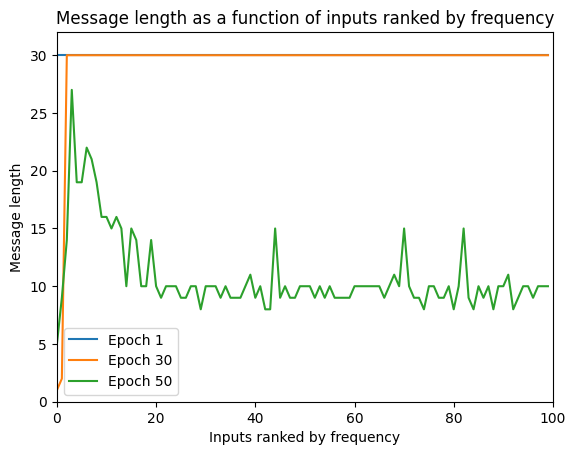

In [12]:
# Choose epochs (between 0 and 500)
#epochs=[1,90,100,500]
epochs=[1,30,50]

for epoch in epochs:
  # Load messages
  messages=load_message("dir_save/messages/messages_"+str(epoch)+".npy")

  # Construct the length distribution
  length_distribution=[]
  for message in messages:
    length_distribution.append(len(message))

  # Add epoch to plot
  plt.plot(length_distribution,label="Epoch "+str(epoch))

# Plot fig
plt.title("Message length as a function of inputs ranked by frequency")
plt.xlabel("Inputs ranked by frequency")
plt.ylabel("Message length")
plt.xlim((0,100))
plt.ylim((0,32))
plt.legend()
plt.show()

**2. Accuracy evolution**

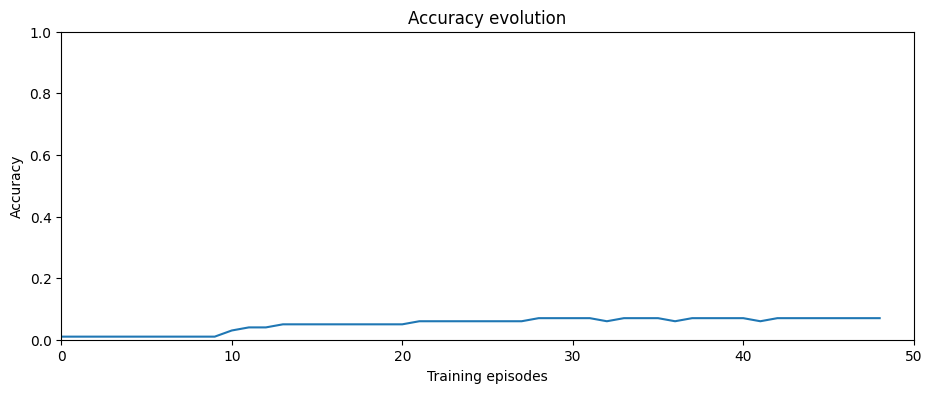

In [13]:
# Get accuracy
accuracy=[]
for i in range(1,n_epoch):
  accuracy.append(np.mean(np.load("dir_save/accuracy/accuracy_"+str(i)+".npy")))

# Plot fig
fig, ax = plt.subplots(1, 1, figsize=(11,4))
ax.plot(accuracy,label="LazImpa",c="tab:blue")
ax.set_title("Accuracy evolution")
ax.set_xlabel("Training episodes")
ax.set_ylabel("Accuracy")
ax.set_xlim((0,n_epoch))
ax.set_ylim((0,1))

plt.show()

**3. Mean length evolution**

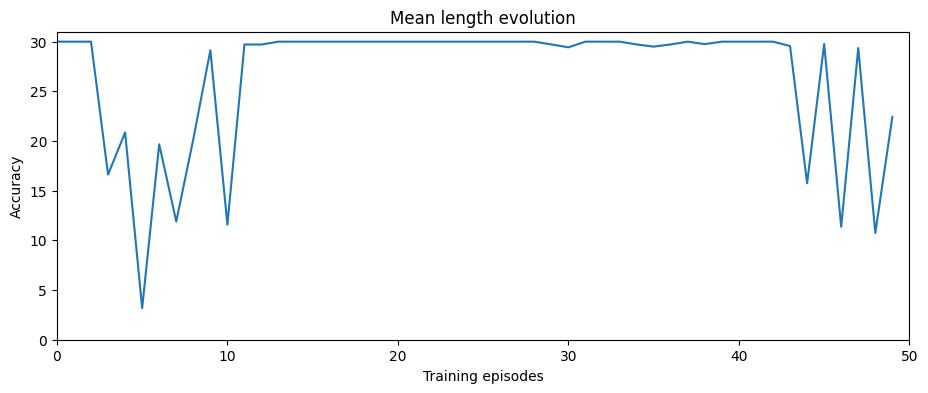

In [14]:
mean_length_evolution=[]

for epoch in range(n_epoch):
  # Load messages
  messages=load_message("dir_save/messages/messages_"+str(epoch)+".npy")

  # Construct the length distribution
  length_distribution=[]
  for message in messages:
    length_distribution.append(len(message))
  
  # Get the mean length
  mean_length_evolution.append(np.mean(length_distribution))

# Plot fig
fig, ax = plt.subplots(1, 1, figsize=(11,4))
ax.plot(mean_length_evolution,label="LazImpa",c="tab:blue")
ax.set_title("Mean length evolution")
ax.set_xlabel("Training episodes")
ax.set_ylabel("Accuracy")
ax.set_xlim((0,n_epoch))
ax.set_ylim((0,31))

plt.show()

**4. Accuracy = f(mean_length)**: co-evolution of the accuracy and mean message length: allow us to spot the beginning of the regularization (laziness)

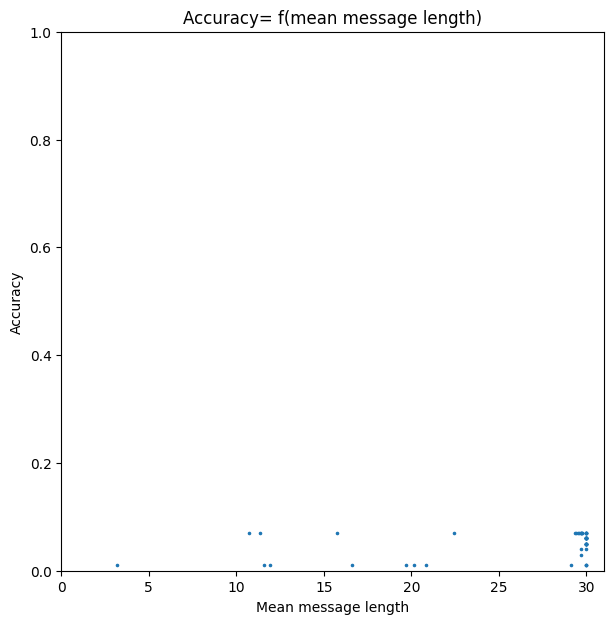

In [15]:
mean_length_evolution=[]
accuracy=[]

for epoch in range(n_epoch):
  # Load messages
  messages=load_message("dir_save/messages/messages_"+str(epoch)+".npy")

  # Construct the length distribution
  length_distribution=[]
  for message in messages:
    length_distribution.append(len(message))
  
  # Get the mean length
  mean_length_evolution.append(np.mean(length_distribution))

  # Get the accuracy
  accuracy.append(np.mean(np.load("dir_save/accuracy/accuracy_"+str(epoch)+".npy")))

# Plot fig
fig, ax = plt.subplots(1, 1, figsize=(7,7))
ax.scatter(mean_length_evolution,accuracy,s=2.5)
ax.set_title("Accuracy= f(mean message length)")
ax.set_xlabel("Mean message length")
ax.set_ylabel("Accuracy")
ax.set_xlim((0,31))
ax.set_ylim((0,1))

plt.show()

**5. Position of informative symbols**: allows us to see where informative symbols are set within the messages

legend:
- yellow: uninformative ; 1: informative; purple: no symbol
- 1: uninformative ; 0: informative ; -1 no symbol

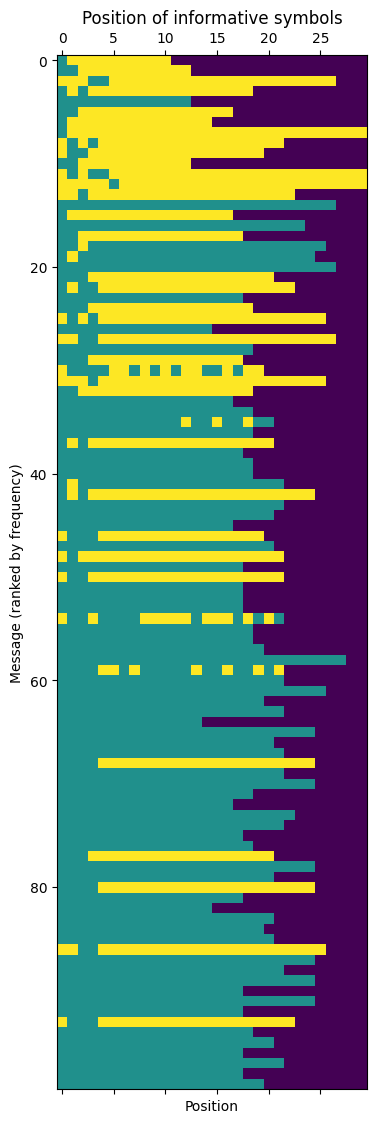

In [60]:
# Color the matrix of "information test"
plt.matshow(np.load("analysis/position_sieve.npy"))
plt.xlabel("Position")
plt.ylabel("Message (ranked by frequency)")
plt.title("Position of informative symbols")
plt.show()

**6. Dynamic evolution of the training**: (takes a few minutes to run)

Create gif

In [46]:
# Create gif
! mkdir images_dir

print("Create the images for gif")

accuracy_lazimpa=[]
mean_len_lazimpa=[]
accuracy_normal=[]
mean_len_normal=[]
accuracy_impatient=[]
mean_len_impatient=[]
accuracy_normreg=[]
mean_len_normreg=[]

for i in range(1,n_epoch):
  messages_lazimpa=load_message("dir_save/messages/messages_"+str(i)+".npy")

  L_lazimpa=[]

  for m in messages_lazimpa:
    L_lazimpa.append(len(m))
  
  mean_len_lazimpa.append(np.mean(L_lazimpa))
  accuracy_lazimpa.append(np.mean(np.load("dir_save/accuracy/accuracy_"+str(i)+".npy")))

  fig, axs = plt.subplots(1, 3, figsize=(11,4))
  axs[0].plot(L_lazimpa,label="LazImpa",c="tab:blue")
  axs[0].set_ylim((0,32))
  axs[0].set_xlabel("Input ranked by frequency")
  axs[0].set_ylabel("Message length") 
  axs[0].set_title("Length distribution") 

  axs[1].plot(accuracy_lazimpa,label="LazImpa",c="tab:blue")
  axs[1].set_xlabel("Training episodes")
  axs[1].set_ylabel("Accuracy")
  axs[1].set_title("Accuracy evolution")
  axs[1].set_xlim((0,n_epoch))
  axs[1].set_ylim((0,1))

  axs[2].plot(mean_len_lazimpa,label="LazImpa",c="tab:blue")
  axs[2].set_title("Mean length evolution")
  axs[2].set_xlabel("Training episodes")
  axs[2].set_ylabel("Mean message length")
  axs[2].set_xlim((0,n_epoch))
  axs[2].set_ylim((0,32))

  fig.tight_layout(pad=2.5)

  fig.suptitle("Episode "+str(i)) 
  plt.savefig("images_dir/test"+str(i)+".png")
  plt.close() 

print("Start creating gif for messages")
img2gif("images_dir","analysis/training_dynamic.gif")

! rm -rf images_dir

Un sous-r�pertoire ou un fichier images_dir existe d�j�.


Create the images for gif
Start creating gif for messages
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for images2gif, since package 'wheel' is not installed.
  Running setup.py install for images2gif: started
  Running setup.py install for images2gif: finished with status 'done'



[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
'rm' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


Display it:

Display gif


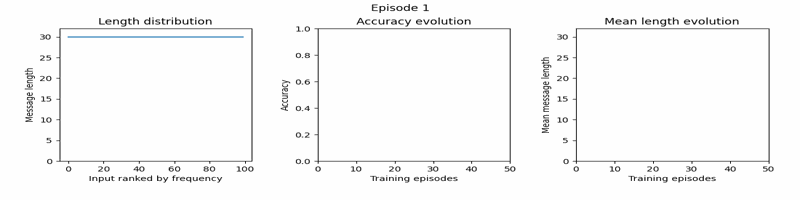

'rm' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


In [47]:
print("Display gif")
from IPython.display import Image

with open('analysis/training_dynamic.gif','rb') as f:
    display(Image(data=f.read(), format='png'))

! rm -rf images_dir